<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo IV: Machine Learning </h1>
<h2 align='center'>  Regresión Polinómica </h2> 

---

# Aspectos teóricos

## Introducción

La **Regresión Polinómica** es, en realidad, una regresión lineal como la que vimos previamente, solamente que ahora calculamos atributos polinómicos para luego hacer regresión lineal. 

En el caso de la regresión lineal teniamos lo siguiente, un vector $X = (x_0,x_1,x_2,\ldots,x_n)$ que representan todos los atributos y a partir de estos valores determinabamos un vector $W$ que contiene todos los parámetros ajustados para el modelo. Ahora, para el caso polinómico, expandimos estas componentes considerando componentes polinómicas de estos atributos, es decir,

$$X_{\mbox{polinomico}} = (x_0,x_1,x_1^2,x_2,x_2^2,\ldots,x_n, x_{n}^n)$$

En este ejemplo, simplemente hemos elevado al cuadrado cada atributo, lo que puede ser suficiente en algunos casos. Dependiendo del grado del polinomio y si deseamos multiplicar un atributo por otro, podemos expandir X mucho más. 

## ¿Cómo hacer una regresión polinómica?

Para hacer una regresión polinómica con scikit-learn, necesitamos la clase **PolinomialFeature** para calcule los atributos polinómicos. Después usaremos la clase **LinearRegressión** para hacer la regresión lineal con los datos polinómicos.

## Ejemplo

Para este ejemplo vamos a geneerar datos sintéticos a partir de la siguiente función:
$$ y = -100 -5x +5x^2 + 0.1x^3 + N(0,800) $$

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [20]:
x = np.linspace(-50,50,500)
y = -100 -5*x +5*x**2 +0.1*x**3 + 800*np.random.randn(500)

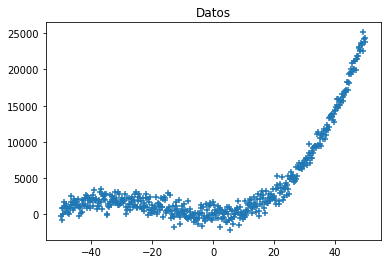

In [24]:
plt.scatter(x,y,marker='+')
plt.title('Datos')
plt.show()

### Transformamos los datos

In [26]:
pf = PolynomialFeatures(degree=3)

In [28]:
X = pf.fit_transform(x.reshape(-1,1))

In [29]:
X.shape

(500, 4)

### Creamos el modelo de regresión lineal

In [35]:
modelo = LinearRegression()

In [36]:
modelo.fit(X,y)

LinearRegression()

### Coeficientes del modelo generado

In [37]:
print('w = ' + str(modelo.coef_) + ', b = ' + str(modelo.intercept_))

w = [ 0.         -2.20186166  5.05132402  0.098425  ], b = -101.21581437206441


### Ecuación del polinomio de regresión

$$\hat{y} = -101.21 - 2.20x + 5.05x^2 + 0.09x^3$$

### Gráfica

In [50]:
v= X*modelo.coef_

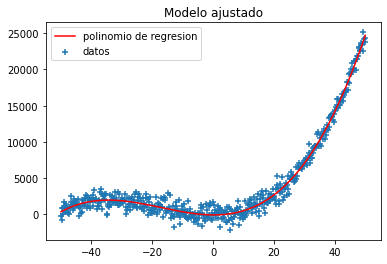

In [61]:
plt.scatter(x,y,marker='+',label='datos')
plt.plot(x,modelo.intercept_+ v[:,1]+v[:,2]+v[:,3],'r',label='polinomio de regresion')
plt.legend()
plt.title('Modelo ajustado')
plt.show()

### Evaluación del modelo

In [64]:
prediccion_entrenamiento = modelo.predict(X)

In [66]:
mse = mean_squared_error(y,prediccion_entrenamiento)
rmse = np.sqrt(mse)

In [67]:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 609849.5215516022
Raíz del Error Cuadrático Medio (RMSE) = 780.9286276937235


In [70]:
r2 = modelo.score(X, y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.9831726075113798


Como podemos apreciar, las medidas de evaluación del modelo son muy buenas:

* Un R2 casi perfecto (lo máximo es 1)
* La Raíz del Error Cuadrático Medio (RMSE), es aproximadamente igual al ruido Gaussiano que introducimos en la función para generar los datos.